# Recurrent Neural Network

![LSTM](imgs/LSTM3-chain.png)

![LSTM](imgs/LSTM2-notation.png)



![LSTM](imgs/LSTM3-focus-f.png)

![LSTM](imgs/LSTM3-focus-i.png)

![LSTM](imgs/LSTM3-focus-C.png)

![LSTM](imgs/LSTM3-focus-o.png)

## From pytorch documentation

\begin{array}{ll} \\
    f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
    i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
    g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
    c_t = f_t * c_{(t-1)} + i_t * g_t \\
    o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\    
    h_t = o_t * \tanh(c_t) \\
\end{array}

## How to define LSTM layer in pytorch

In [33]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [1]:
batch_size = 2
seq_len = 10
input_size = 3
hidden_size = 4 

inputs = torch.randn(seq_len, batch_size, input_size)
inputs

tensor([[[-7.9371e-01, -2.0238e+00, -1.3367e+00],
         [-7.1214e-01,  3.9357e-01, -8.0636e-01]],

        [[ 1.0664e+00, -1.8921e+00,  1.1003e+00],
         [ 9.2181e-01,  4.6061e-01, -3.7591e-01]],

        [[-1.1430e+00,  1.9850e+00,  6.8247e-01],
         [ 6.3254e-01, -1.6362e+00, -6.4329e-01]],

        [[ 3.7377e-01, -4.9265e-01, -1.0238e-01],
         [ 4.0733e-01,  6.7559e-02, -1.5383e+00]],

        [[ 3.5512e-02,  7.9347e-02,  6.2202e-01],
         [ 1.2980e+00, -1.5078e-03, -1.3330e+00]],

        [[ 6.5556e-02, -2.8847e-01,  4.2900e-01],
         [ 3.1263e-02, -5.2232e-03,  5.5556e-01]],

        [[ 2.9324e-02,  2.9765e-01, -8.5468e-01],
         [ 2.6762e-01, -3.6226e-01, -1.6829e+00]],

        [[-1.8964e-01, -2.9445e-01, -8.9548e-01],
         [-2.6878e+00, -7.7660e-01, -2.7466e-01]],

        [[ 5.9321e-01, -1.4983e+00, -3.5858e-01],
         [-6.0709e-01, -7.1092e-01, -1.6367e+00]],

        [[ 4.7706e-01,  1.4737e+00, -3.9085e-01],
         [-1.4603e+00,  4.7680e-

In [2]:
lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [3]:
## hidden_0 = (h_0, c_0)
hidden_0 = (torch.zeros(1, batch_size, hidden_size), torch.zeros(1, batch_size, hidden_size))

In [4]:
lstm_out, lstm_hidden = lstm(inputs)
lstm_out.shape

torch.Size([10, 2, 4])

In [5]:
lstm_out

tensor([[[ 0.1161, -0.0449,  0.1356, -0.0908],
         [ 0.0797, -0.1030, -0.0519, -0.0097]],

        [[ 0.2028, -0.1207,  0.0942, -0.0380],
         [ 0.0988, -0.0903,  0.1654,  0.0538]],

        [[ 0.1246, -0.0615,  0.2019, -0.0452],
         [-0.0669, -0.2622, -0.1729,  0.1506]],

        [[ 0.1125, -0.1810,  0.0160,  0.0975],
         [ 0.0633, -0.2287, -0.0961,  0.1149]],

        [[ 0.1426, -0.1711,  0.0510,  0.0349],
         [ 0.0473, -0.2513, -0.1071,  0.0590]],

        [[ 0.0526, -0.2139,  0.0484,  0.1440],
         [ 0.0955, -0.2225,  0.0076,  0.0419]],

        [[ 0.0832, -0.1676,  0.1285,  0.1490],
         [-0.0626, -0.2704, -0.0761,  0.1422]],

        [[ 0.1588, -0.0668,  0.1662, -0.1116],
         [ 0.0823, -0.2291, -0.0254,  0.0449]],

        [[ 0.1449, -0.1012,  0.1712, -0.1042],
         [ 0.0258, -0.2339,  0.0712,  0.1279]],

        [[ 0.0864, -0.1954,  0.0454,  0.1037],
         [ 0.1143, -0.0547,  0.1980,  0.0086]]], grad_fn=<StackBackward>)

If we want to put hidden inputs to zeros, there is no need to provide them.

In [6]:
lstm_out, lstm_hidden = lstm(inputs)
lstm_out

tensor([[[ 0.1161, -0.0449,  0.1356, -0.0908],
         [ 0.0797, -0.1030, -0.0519, -0.0097]],

        [[ 0.2028, -0.1207,  0.0942, -0.0380],
         [ 0.0988, -0.0903,  0.1654,  0.0538]],

        [[ 0.1246, -0.0615,  0.2019, -0.0452],
         [-0.0669, -0.2622, -0.1729,  0.1506]],

        [[ 0.1125, -0.1810,  0.0160,  0.0975],
         [ 0.0633, -0.2287, -0.0961,  0.1149]],

        [[ 0.1426, -0.1711,  0.0510,  0.0349],
         [ 0.0473, -0.2513, -0.1071,  0.0590]],

        [[ 0.0526, -0.2139,  0.0484,  0.1440],
         [ 0.0955, -0.2225,  0.0076,  0.0419]],

        [[ 0.0832, -0.1676,  0.1285,  0.1490],
         [-0.0626, -0.2704, -0.0761,  0.1422]],

        [[ 0.1588, -0.0668,  0.1662, -0.1116],
         [ 0.0823, -0.2291, -0.0254,  0.0449]],

        [[ 0.1449, -0.1012,  0.1712, -0.1042],
         [ 0.0258, -0.2339,  0.0712,  0.1279]],

        [[ 0.0864, -0.1954,  0.0454,  0.1037],
         [ 0.1143, -0.0547,  0.1980,  0.0086]]], grad_fn=<StackBackward>)

Finally the last output is the output of RRR. We can get it by

In [7]:
lstm_out[-1]

tensor([[ 0.0864, -0.1954,  0.0454,  0.1037],
        [ 0.1143, -0.0547,  0.1980,  0.0086]], grad_fn=<SelectBackward>)

It is often convient to have batches as the first dimension of the input. One can do it by adding `batch_first=True` parameter.

In [8]:
lstm_batch_first = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True) 
inputs_batch_first = torch.randn(batch_size, seq_len, input_size)
inputs_batch_first

tensor([[[ 1.2054, -0.8651, -0.6088],
         [ 1.1406,  0.6082, -1.6735],
         [ 0.1723,  0.3467,  0.4114],
         [-1.9259, -0.2567, -1.2048],
         [-1.6136,  1.3430, -0.4050],
         [ 1.1966, -1.6512, -0.6767],
         [-0.2106, -2.3519,  0.2720],
         [-0.1093,  1.0253, -0.1260],
         [-1.0609,  0.8758,  0.2576],
         [ 0.8765,  1.4954, -0.0666]],

        [[-0.0217,  1.5338, -1.4219],
         [ 0.2273, -0.3218,  0.3919],
         [ 0.0749,  0.4817, -1.1825],
         [ 2.1782, -0.3505,  1.3469],
         [-0.4601,  1.3531, -0.0419],
         [ 0.0473, -0.6126,  0.4255],
         [-0.3531, -1.0316,  0.5059],
         [ 0.5735,  0.4778,  0.5165],
         [-1.7511,  0.0114, -0.2766],
         [-1.0167,  1.3915, -0.7804]]])

In [9]:
lstm_out, lstm_hidden = lstm_batch_first(inputs_batch_first)
lstm_out

tensor([[[-0.0567,  0.1265,  0.0624,  0.2018],
         [-0.1659,  0.3151, -0.1186,  0.3846],
         [-0.1493,  0.0682, -0.0403,  0.2772],
         [-0.3941, -0.1411,  0.0983,  0.2673],
         [-0.4439, -0.2128, -0.0445,  0.2855],
         [-0.1648, -0.0416,  0.0435,  0.1917],
         [-0.0991, -0.1108,  0.0799,  0.1383],
         [-0.1874, -0.0555,  0.0368,  0.3100],
         [-0.2655, -0.1287,  0.0010,  0.2873],
         [-0.1702,  0.0646, -0.2415,  0.3772]],

        [[-0.1996,  0.1648, -0.2542,  0.3286],
         [-0.1348,  0.0275, -0.0138,  0.2211],
         [-0.2382,  0.1150, -0.0923,  0.3565],
         [-0.0244,  0.0877, -0.0228,  0.2297],
         [-0.1829,  0.0225, -0.1591,  0.3706],
         [-0.1361, -0.0329,  0.0252,  0.2318],
         [-0.1136, -0.1019,  0.1046,  0.2007],
         [-0.1038, -0.0251,  0.0933,  0.2877],
         [-0.3108, -0.1780,  0.1325,  0.2571],
         [-0.3798, -0.1602, -0.0726,  0.3382]]], grad_fn=<TransposeBackward0>)

Then we get the finial output by:

In [10]:
lstm_out[:, -1]

tensor([[-0.1702,  0.0646, -0.2415,  0.3772],
        [-0.3798, -0.1602, -0.0726,  0.3382]], grad_fn=<SelectBackward>)

## Embedings

In [11]:
dict_size = 100
sentences = torch.randint(dict_size, (batch_size, seq_len))
sentences

tensor([[36, 67, 43, 95, 89,  8, 59, 93, 73, 69],
        [47, 66, 68, 29, 70, 16, 58, 13, 37, 94]])

In [12]:
embedding_dim = 3
embedding = nn.Embedding(dict_size, embedding_dim)

In [13]:
sentences_embedded = embedding(sentences)
sentences_embedded

tensor([[[ 1.0091, -0.3593, -1.0621],
         [-1.7992, -0.0894,  1.2168],
         [ 0.4249, -0.9113, -0.9369],
         [ 1.7890, -1.0901,  0.7563],
         [-0.6374,  1.1834,  0.6713],
         [-1.2554, -1.4542, -0.3407],
         [-1.1324, -0.4685,  0.5710],
         [ 0.0318,  1.0612,  1.9154],
         [ 0.0588,  0.8046,  0.2209],
         [ 0.0756, -0.6359, -1.8824]],

        [[-0.0348,  0.9834, -0.2814],
         [ 0.1302, -0.7690, -1.2987],
         [-1.1199, -0.3056, -0.0716],
         [-1.2604,  1.3658,  0.7427],
         [-1.5014,  0.6390, -0.5878],
         [-0.7691,  1.7891,  0.6372],
         [ 1.7406,  0.4675,  0.0660],
         [ 1.0832, -0.4642,  0.7879],
         [ 0.0817, -0.8927,  0.7386],
         [-0.0728,  0.7193, -0.5492]]], grad_fn=<EmbeddingBackward>)

In [14]:
lstm_out, _ = lstm_batch_first(sentences_embedded)
lstm_out[:, -1]

tensor([[-0.2681,  0.0815,  0.0451,  0.3268],
        [-0.1928,  0.0247,  0.0008,  0.3499]], grad_fn=<SelectBackward>)

### Natural Language Processing (NLP)

Next we consider a dataset with text and the goal is to evaluate whether they are toxic or non-toxic.

You can download the dataset in the following link:

[here](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge). 


In [34]:
import pandas as pd

comments_df = pd.read_csv("data/jigsaw-toxic-comment-classification-challenge/train.csv")
comments_df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [35]:
n = int(len(comments_df)/4)
comments_df = comments_df.iloc[1:n]
len(comments_df)

39891

In [36]:
from sklearn.model_selection import train_test_split
label_colnames = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

X_train, X_test, y_train, y_test = \
    train_test_split(comments_df[['comment_text']], comments_df[label_colnames], random_state=667)
X_train.head(2)

,comment_text
3949,Hello \n\nI guess the reqeust for the lion vs ...
36054,"Also, you haven't said what information was de..."


In [37]:
comments_df = None 

In [38]:
import re

import nltk
from nltk.stem import SnowballStemmer

BAD_SYMBOLS_RE = re.compile('[^0-9a-z .,]')
STEMMER = SnowballStemmer('english')

class TextPreprocessor:
        
    def transfrom_text(self, text):
        text = text.lower()
        text = re.sub(BAD_SYMBOLS_RE, " ", text) # process bad symbols
        # text = " ".join([STEMMER.stem(word) for word in text.split()])
        return text
    
    def transform(self, series):
        return series.apply(lambda text: self.transfrom_text(text))
    
    def labels_to_text(self, text, extra_labels):
        for idx in extra_labels.index:
            aux = text.loc[[idx]]
            text = text.append(aux.iloc[[0]])
        return text    
    
    def over_sampling(self,text,labels,extra_positive):
        extra_labels = pd.DataFrame()
        for idx in range(len(extra_positive)):
            target = extra_positive[idx]
            if idx == 0:
                extra_labels = labels.groupby([target]).get_group(1)
            else:
                prev_target = extra_positive[idx-1]
                extra_labels = extra_labels[extra_labels[target] == extra_labels[prev_target]]
        
        labels = labels.append(extra_labels)
        text = self.labels_to_text(text,extra_labels)

        return text,labels
    
    def balanced_partition(self,text,labels,min_freq):
        while True :
            labels_dist = labels.sum()/len(labels)
            extra_positive = []
            for label in labels_dist.keys():
                if labels_dist[label] < min_freq:
                    extra_positive.append(label) 
            if len(extra_positive) == 0: 
                return text,labels
            else: 
                text,labels = self.over_sampling(text,labels,extra_positive)
        
        

In [39]:
y_train.sum()/len(y_train)

toxic            0.097232
severe_toxic     0.010763
obscene          0.052376
threat           0.003443
insult           0.049535
identity_hate    0.008991
dtype: float64

In [40]:
preprocessor = TextPreprocessor()
X_train_trs = preprocessor.transform(X_train['comment_text'])
X_train_preprocessed, y_train = preprocessor.balanced_partition(X_train_trs,y_train,0.02)
X_test_preprocessed = preprocessor.transform(X_test['comment_text'])

In [10]:
print(X_train["comment_text"].iloc[0])
print('---------------------------------------------------------------------------------------------------------------------')
print(X_train_preprocessed.iloc[0])

"

 Re: Vandalism revert 

Thanks for the notice, repeat vandalism from multiple accounts can get messy )   "
---------------------------------------------------------------------------------------------------------------------
    re  vandalism revert   thanks for the notice, repeat vandalism from multiple accounts can get messy      


In [41]:
X_train_trs = None
X_train = None
X_test = None

In [42]:
y_train.sum()/len(y_train),len(X_train_preprocessed),len(y_train)

(toxic            0.114023
 severe_toxic     0.029162
 obscene          0.070002
 threat           0.021978
 insult           0.067213
 identity_hate    0.027423
 dtype: float64, 30485, 30485)

In [43]:
from stop_words import get_stop_words

STOP_WORDS = get_stop_words('en')

In [44]:
def create_dicts(text, min_count = 1):
    
    word_dict = {}
    words = text.split()
   
    for word in words:
        word_dict[word] = word_dict.get(word,0) + 1
        
    frequent_words = []
    for key, value in word_dict.items():
        if value >= min_count and key not in STOP_WORDS:
            if key == '.': key = '<dot>'
            elif key == ',': key = '<coma>'
            frequent_words.append(key)
            
    word_list = ["<UNK>", "<PAD>"] + sorted(frequent_words)
    
    word2idx = {word_list[idx]: idx for idx in range(len(word_list))}
    idx2word = {idx: word_list[idx] for idx in range(len(word_list))}
    return word2idx, idx2word

class Tokenizer:
    
    def __init__(self):
        self.word2idx = None
        self.idx2word = None
        
    def fit(self, X,min_count):
        text = " ".join(X)
        self.word2idx, self.idx2word = create_dicts(text,min_count)
    
    def transform(self, X):
        return [self.transform_line(line) for line in X]
        
    def transform_line(self, line):
        return [self.word2idx.get(self.convert(word), 0) for word in line.split()]
    
    def convert(self,word):
            if word == '.': word = '<dot>'
            elif word == ',': word = '<coma>'
            return word

In [45]:
tokenizer = Tokenizer()
tokenizer.fit(X_train_preprocessed,3)

In [46]:
X_train_tokenized = tokenizer.transform(X_train_preprocessed)
X_test_tokenized = tokenizer.transform(X_test_preprocessed)

In [47]:
X_train_preprocessed = None
X_test_preprocessed = None

In [48]:
class Cutter:

    def __init__(self, size=150):
        self.size = size
        
    def transform(self, X):
        new_X = []
        for line in X:
            new_line = line[:self.size]
            new_line = new_line + [1] * (self.size - len(new_line))
            new_X.append(new_line)
        return new_X    

In [49]:
cutter = Cutter()
X_train_cutted = cutter.transform(X_train_tokenized)
X_test_cutted = cutter.transform(X_test_tokenized)

In [50]:
X_train_tokenized = None
X_test_tokenized = None

In [51]:
labels = torch.from_numpy(y_train.values)
labels

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1]])

In [52]:
train_data = TensorDataset(torch.tensor(X_train_cutted), torch.from_numpy(y_train.values).float())
test_data = TensorDataset(torch.tensor(X_test_cutted), torch.from_numpy(y_test.values).float())

batch_size = 32

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=len(test_data))

In [53]:
class LSTMModel(nn.Module):
    
    def __init__(self, dict_size, output_size, embedding_dim, hidden_dim, hidden_inter_dim):
        super().__init__()
        self.embedding = nn.Embedding(dict_size, embedding_dim)
        self.lstm1 = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_inter_dim, batch_first=True)
        self.fc = nn.Linear(hidden_inter_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        embeded = self.embedding(x)
        lstm_out, _ = self.lstm1(embeded)
        #lstm_out = lstm_out[:, -1] 
        lstm_outer,_ = self.lstm2(lstm_out)
        lstm_outer = lstm_outer[:,-1]
        logits = self.fc(lstm_outer)
        out = self.sigmoid(logits)
        return out

In [54]:
dict_size = len(tokenizer.word2idx)
output_size = len(label_colnames)
embedding_dim = 3
hidden_dim = 4
hidden_inter_dim = 3

lstm_model = LSTMModel(dict_size, output_size, embedding_dim, hidden_dim,hidden_inter_dim)

In [23]:
##### Load train model

# lstm_model.load_state_dict(torch.load("models/lstm_model3.pt"))
# lstm_model.eval()

In [24]:
# X_train_torch = torch.tensor(X_train_cutted)
# X_test_torch = torch.tensor(X_test_cutted)
# X_train_torch.shape

In [41]:
# lstm_model(X_train_torch)

In [55]:
dataiter = iter(train_loader)
input_data, labels = dataiter.next()
lstm_model(input_data)

tensor([[0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4236, 0.4949, 0.5465, 0.5243, 0.5099, 0.4440],
        [0.4199, 0.4900, 0.5522, 0.5269, 0.5122, 0.4450],
        [0.423

In [56]:
lr = 0.05
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)

In [58]:
n_epoch = 4
print_every = 300

lstm_model.train()
optimizer.train = True

loss_over_time = [] # to track the loss as the network trains
    
for epoch in range(n_epoch):
    
    running_loss = 0.0
    
    for batch_i, (input_data, labels) in enumerate(train_loader):
        # Zero gradients (just in case)
        optimizer.zero_grad()

        # Forward pass, calculate predictions
        output = lstm_model(input_data) 
        # Calculate loss
        loss = criterion(output, labels)
        ## Backward propagation
        loss.backward()
        ## Upade weights
        optimizer.step()
        
        # print loss statistics
        # to convert loss into a scalar and add it to running_loss, we use .item()
        running_loss += loss.item()

        if batch_i % print_every ==  print_every - 1:    # print everyx batches (
                avg_loss = running_loss/print_every
                # record and print the avg loss over the 100 batches
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, avg_loss))
                running_loss = 0.0

print('Finished Training')

Epoch: 1, Batch: 300, Avg. Loss: 0.20460538855443397
Epoch: 1, Batch: 600, Avg. Loss: 0.20364939082413913
Epoch: 1, Batch: 900, Avg. Loss: 0.20140411200622718
Epoch: 2, Batch: 300, Avg. Loss: 0.1745471621491015
Epoch: 2, Batch: 600, Avg. Loss: 0.13776160014793276
Epoch: 2, Batch: 900, Avg. Loss: 0.13191642358899117
Epoch: 3, Batch: 300, Avg. Loss: 0.11910004152605931
Epoch: 3, Batch: 600, Avg. Loss: 0.11807065438479185
Epoch: 3, Batch: 900, Avg. Loss: 0.12585495902846258
Epoch: 4, Batch: 300, Avg. Loss: 0.12126149378716945
Epoch: 4, Batch: 600, Avg. Loss: 0.11036608431488276
Epoch: 4, Batch: 900, Avg. Loss: 0.11629927508533001
Finished Training


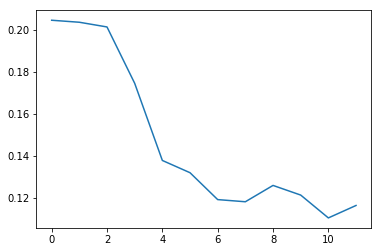

In [59]:
import matplotlib.pyplot as plt
plt.plot(loss_over_time)
plt.show()

### One Epoch of Training:

1. Type : LSTM-MLP   ; Embeding: 3 ; Hidden Dim : 4   ; LR : 0.005 ; Avg Loss : 0.167 
2. Type : LSTM-MLP   ; Embeding: 4 ; Hidden Dim : 4   ; LR : 0.005 ; Avg Loss : 0.173
3. Type : LSTM-MLP   ; Embeding: 3 ; Hidden Dim : 2   ; LR : 0.005 ; Avg Loss : 0.171
4. Type : LSTM-MLP   ; Embeding: 3 ; Hidden Dim : 3   ; LR : 0.005 ; Avg Loss : 0.174

### Four Epochs of Training:

5. Type : 2xLSTM-MLP ; Embeding: 3 ; Hidden Dim : 3-4 ; LR : 0.05  ; Avg Loss : 0.116


#### Print model's state_dict

In [60]:
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

embedding.weight 	 torch.Size([29467, 3])
lstm1.weight_ih_l0 	 torch.Size([16, 3])
lstm1.weight_hh_l0 	 torch.Size([16, 4])
lstm1.bias_ih_l0 	 torch.Size([16])
lstm1.bias_hh_l0 	 torch.Size([16])
lstm2.weight_ih_l0 	 torch.Size([12, 4])
lstm2.weight_hh_l0 	 torch.Size([12, 3])
lstm2.bias_ih_l0 	 torch.Size([12])
lstm2.bias_hh_l0 	 torch.Size([12])
fc.weight 	 torch.Size([6, 3])
fc.bias 	 torch.Size([6])


#### Save model

In [30]:
torch.save(lstm_model.state_dict(), "models/lstm_model3.pt")

### Evaluation

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classification(y, y_hat, y_proba):
    return {
        "Accuracy": accuracy_score(y, y_hat),
        "Precision": precision_score(y, y_hat),
        "Recall": recall_score(y, y_hat),
        "F1-score": f1_score(y, y_hat),
        "AUC": roc_auc_score(y, y_proba),
    }


In [62]:
import numpy as np
num_classes = len(label_colnames)
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
lstm_model.eval()

# get the input images and their corresponding labels
inputs, labels = test_loader.dataset.tensors

# forward pass to get outputs
outputs = lstm_model(inputs)

# calculate the loss
loss = criterion(outputs, labels)

# update average test loss 
test_loss = test_loss + ((torch.ones(1) / (len(labels) + 1)) * (loss.data - test_loss))

# get the predicted class from the maximum value in the output-list of class scores
metrics = {}
for j in range(num_classes):
    # compare predictions to true label
    predicted_class = np.round(outputs.data[:,j])
    labels_class = labels.data[:,j]
    class_total[j] = len(labels)
    class_correct[j] = (labels_class==predicted_class).sum()
    metrics[label_colnames[j]] = evaluate_classification(labels_class, predicted_class, outputs.data[:,j])
    #(predicted_class == labels_class).sum()
              
print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

Test Loss: 0.000013



/home/oriol/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/oriol/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
(0.714+0.180+0.59+0.26+0.0+0.51)/6

0.37566666666666665

In [63]:
for label in metrics:
    print(label)
    print(metrics[label])

toxic
{'Accuracy': 0.914368795748521, 'F1-score': 0.4019607843137255, 'AUC': 0.7805729364455313, 'Recall': 0.2797270955165692, 'Precision': 0.7139303482587065}
severe_toxic
{'Accuracy': 0.9722250075203048, 'F1-score': 0.2613333333333333, 'AUC': 0.8872581422571095, 'Recall': 0.47572815533980584, 'Precision': 0.1801470588235294}
obscene
{'Accuracy': 0.9511681540158428, 'F1-score': 0.47122692725298587, 'AUC': 0.8382656915528678, 'Recall': 0.3916967509025271, 'Precision': 0.5912806539509536}
threat
{'Accuracy': 0.9968916073398175, 'F1-score': 0.0, 'AUC': 0.8427427466401906, 'Recall': 0.0, 'Precision': 0.0}
identity_hate
{'Accuracy': 0.9906748220194526, 'F1-score': 0.021052631578947368, 'AUC': 0.8291565750582145, 'Recall': 0.01098901098901099, 'Precision': 0.25}
insult
{'Accuracy': 0.9500651759751328, 'F1-score': 0.42758620689655175, 'AUC': 0.8343977472633352, 'Recall': 0.36470588235294116, 'Precision': 0.5166666666666667}


1. Test Loss : 0.000004 ; Accuracy : 0.9608 ; Precision : 0.433
2. Test Loss : 0.000004 ; Accuracy : 0.9605 ; Precision : 0.361
3. Test Loss : 0.000004 ; Accuracy : 0.9623 ; Precision : 0.0
4. Test Loss : 0.000004 ; Accuracy : 0.9630 ; Precision : 0.291
5. Test Loss : 0.000013 ; Accuracy : 0.9615 ; Precision : 0.375

In [45]:
total_evaluation = {}
for metric in metrics['toxic']:
    total_evaluation[metric] = 0
    for label in metrics:
        total_evaluation[metric] += metrics[label][metric]
    total_evaluation[metric] /= num_classes
print(total_evaluation)

{'Precision': 0.4345074859780742, 'Accuracy': 0.9636193484237001, 'Recall': 0.007582406975434276, 'F1-score': 0.014441843174986523, 'AUC': 0.6031137234185818}


# Final project

* Reduce vocabulary size by removing very unfrequent words
    * Unfrequent words removed & STOP WORDS
* Tokenize dots, comas, etc, into `<dot>`, `<coma>` respectively.
    * Mapping function: create_dict & convert
* Add another layer of LSTM
* Rebalance train dataset by repeating positive example 
    * Balanced Partition function: min_freq. per each class
* Play with parameters.
    * Embeding & Hidden Dim

## Extra

One of the following:
* Submit to kaggle
* Create generator of comments.